# TItle
[Dataset](https://kaggle.com/competitions/applications-of-deep-learningwustl-spring-2020)

## Image Classification  

## The Dataset

## Overfitting and Underfitting Considerations

## Outline

### Downloads and Imports

In [25]:
import pandas as pd
import tensorflow as tf
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score,auc,roc_curve,roc_auc_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.pipeline import Pipeline
import sys
import re
import shutil
import os
import matplotlib.pyplot as plt
import math
import scipy.ndimage
from tensorflow.keras import datasets, layers, models, utils
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageDraw
from scikeras.wrappers import KerasClassifier, KerasRegressor
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style(style='white')
sns.set(rc={'figure.figsize':(12,8)})
plt.rcParams['figure.figsize']=(12,8)


In [38]:
# !kaggle datasets download jeffheaton/glasses-or-no-glasses
# !unzip glasses-or-no-glasses.zip

## Cleaning and EDA

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v504,v505,v506,v507,v508,v509,v510,v511,v512,glasses
0,1,0.37797,-0.94808,0.01346,0.17893,0.37795,0.63571,0.13943,-0.25607,-0.39341,...,-0.03494,1.32443,-0.94570,0.02055,-1.23908,0.43507,1.08635,1.69027,0.61609,0
1,2,0.07609,-0.09774,0.39666,-0.39026,0.10606,0.52774,0.07105,0.33720,0.69917,...,0.86624,-1.24953,-0.21511,-1.54146,1.04765,-1.24035,0.00866,-1.27640,-0.60496,1
2,3,1.19391,-0.68707,-0.68422,-0.36378,-0.60847,-0.40118,1.45432,0.00592,1.68940,...,-0.35893,0.02330,0.31548,-0.34923,-0.41772,-0.58175,-0.60177,0.43555,0.41982,1
3,4,1.34949,-0.31498,-1.30248,0.50278,1.66292,-1.06094,-0.70835,-0.24237,-0.15509,...,0.23942,0.20774,0.81792,-0.74814,-0.62521,0.01689,0.83997,-0.46986,0.06755,0
4,5,-0.03512,-0.34196,0.14230,1.50513,-0.14364,0.49429,0.07823,-0.04356,0.42009,...,-1.78407,0.07465,1.50182,-0.41289,-0.55908,-0.29702,0.83641,0.59756,-0.20298,0


In [4]:

directory = 'faces-spring-2020/faces-spring-2020/face-'
df['path'] = df['id'].apply(lambda x: directory + str(x) + '.png').tolist()
df = df[['id','path', 'glasses']]

In [5]:
df.head()

,id,path,glasses
0,1,faces-spring-2020/faces-spring-2020/face-1.png,0
1,2,faces-spring-2020/faces-spring-2020/face-2.png,1
2,3,faces-spring-2020/faces-spring-2020/face-3.png,1
3,4,faces-spring-2020/faces-spring-2020/face-4.png,0
4,5,faces-spring-2020/faces-spring-2020/face-5.png,0


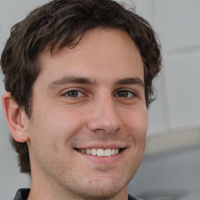

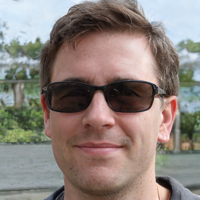

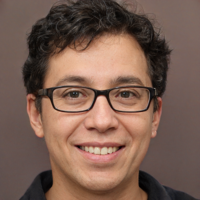

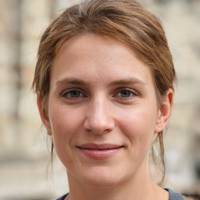

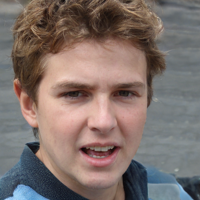

In [6]:
path='faces-spring-2020/faces-spring-2020/face-'
for i in range(1,6):
    img=Image.open(f'{path}{i}.png')
    imgr=img.resize((200,200))
    display(imgr)

In [7]:
df.head()

,id,path,glasses
0,1,faces-spring-2020/faces-spring-2020/face-1.png,0
1,2,faces-spring-2020/faces-spring-2020/face-2.png,1
2,3,faces-spring-2020/faces-spring-2020/face-3.png,1
3,4,faces-spring-2020/faces-spring-2020/face-4.png,0
4,5,faces-spring-2020/faces-spring-2020/face-5.png,0


In [8]:
df.glasses.value_counts()

1    2856
0    1644
Name: glasses, dtype: int64

In [9]:
dfg=df[df.glasses==1]

In [10]:
dfg.head()

,id,path,glasses
1,2,faces-spring-2020/faces-spring-2020/face-2.png,1
2,3,faces-spring-2020/faces-spring-2020/face-3.png,1
5,6,faces-spring-2020/faces-spring-2020/face-6.png,1
6,7,faces-spring-2020/faces-spring-2020/face-7.png,1
7,8,faces-spring-2020/faces-spring-2020/face-8.png,1


In [11]:
dfn=df[df.glasses==0]

In [12]:
dfn.head()

,id,path,glasses
0,1,faces-spring-2020/faces-spring-2020/face-1.png,0
3,4,faces-spring-2020/faces-spring-2020/face-4.png,0
4,5,faces-spring-2020/faces-spring-2020/face-5.png,0
8,9,faces-spring-2020/faces-spring-2020/face-9.png,0
10,11,faces-spring-2020/faces-spring-2020/face-11.png,0


In [13]:
def dataset(start,end):
    data=[]
    for i in range(start,end):
        data.append(dfn.iloc[i])
        data.append(dfg.iloc[i])
    return data

data=pd.DataFrame(data=dataset(0,1600))


In [14]:
data.glasses.value_counts()

0    1600
1    1600
Name: glasses, dtype: int64

In [15]:
data.head()

,id,path,glasses
0,1,faces-spring-2020/faces-spring-2020/face-1.png,0
1,2,faces-spring-2020/faces-spring-2020/face-2.png,1
3,4,faces-spring-2020/faces-spring-2020/face-4.png,0
2,3,faces-spring-2020/faces-spring-2020/face-3.png,1
4,5,faces-spring-2020/faces-spring-2020/face-5.png,0


In [ ]:
data.glasses.value_counts()

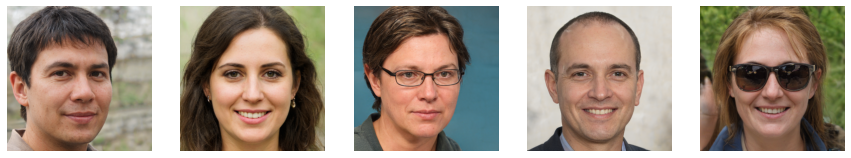

In [ ]:

images=[]
while len(images)<5:
    num=random.randint(0,3200)
    if num not in images:
        images.append(num)
fig, axes = plt.subplots(1, 5, figsize=(15, 15))
for i in range(5):
    image = Image.open(data.iloc[images[i]].path)
    axes[i].imshow(image)
    axes[i].axis('off')
plt.show()

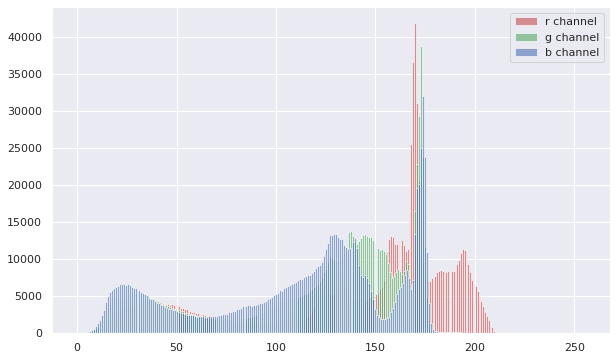

In [32]:
def plot_pixel_distribution(image):
    image = np.array(image)
    plt.figure(figsize=(10, 6))
    for i, color in enumerate(['r', 'g', 'b']):
        plt.hist(image[:, :, i].flatten(), bins=256, color=color, alpha=0.6, label=f"{color} channel")
    plt.legend()
    plt.show()
image = Image.open(data.iloc[0].path)
plot_pixel_distribution(image)

In [36]:
image_sizes = [Image.open(img).size for img in data.path]  # Get width and height of all images
unique_sizes = set(image_sizes)
print(f"Unique image sizes: {unique_sizes}")

Unique image sizes: {(1024, 1024)}


## Data Wrangling

In [37]:
!rm -rf Dataset

In [ ]:
y = data['glasses']
X = data.drop(columns=['glasses'])

# Split train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2)

# Paths
directory_of_images = 'faces-spring-2020/faces-spring-2020/'
source_dir = directory_of_images
destination_base_dir = 'Dataset'
train_dir = os.path.join(destination_base_dir, 'train')
val_dir = os.path.join(destination_base_dir, 'val')

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Create subdirectories for each class in train and val directories
for label in data['glasses'].unique():
    os.makedirs(os.path.join(train_dir, str(label)), exist_ok=True)
    os.makedirs(os.path.join(val_dir, str(label)), exist_ok=True)

# Function to copy images to the respective directories
def copy_images(df, base_dir, is_labeled=True):
    for img_id, label in zip(df['id'], df.get('glasses', [None]*len(df))):
        img_name = f'face-{img_id}.png'  # Format the image name properly
        img_path = os.path.join(source_dir, img_name)
        if os.path.isfile(img_path):
            if is_labeled:
                dest_dir = os.path.join(base_dir, str(label))
            else:
                dest_dir = base_dir
            dest_path = os.path.join(dest_dir, img_name)
            shutil.copy2(img_path, dest_path)  # Copy file to destination
        else:
            print(f"File {img_name} not found.")

# Convert DataFrames for easier image moving
df_train = X_train.copy()
df_train['glasses'] = y_train
df_val = X_val.copy()
df_val['glasses'] = y_val

# Copy train images into class subdirectories
copy_images(df_train, train_dir)

# Copy validation images into class subdirectories
copy_images(df_val, val_dir)

# Copy test images directly into test directory (since they have no labels)

print("Images have been classified into train and  val directories.")


Images have been classified into train and  val directories.


In [ ]:
datagen = ImageDataGenerator(
            rescale=1./255,
            featurewise_center=False,  
            samplewise_center=False,  
            featurewise_std_normalization=False, 
            samplewise_std_normalization=False,  
            zca_whitening=False, 
            rotation_range=20,  
            width_shift_range=0.1,  
            height_shift_range=0.1,  
            horizontal_flip=True,  
            vertical_flip=True)  

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dataset = datagen.flow_from_directory(
    directory='Dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_dataset = val_datagen.flow_from_directory(
    directory='Dataset/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 2560 images belonging to 2 classes.
Found 640 images belonging to 2 classes.


## Model Building

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation="sigmoid"))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset, callbacks=[es])

Epoch 1/10


2024-11-16 13:48:19.024767: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-11-16 13:48:20.630578: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


80/80 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.5180 - loss: 0.7484 - val_accuracy: 0.6562 - val_loss: 0.6217
Epoch 2/10


2024-11-16 13:51:07.670341: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-11-16 13:51:09.295913: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


80/80 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.6854 - loss: 0.5749 - val_accuracy: 0.8438 - val_loss: 0.4216
Epoch 3/10


2024-11-16 13:53:54.464418: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-11-16 13:53:56.047841: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


80/80 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.7945 - loss: 0.4590 - val_accuracy: 0.8438 - val_loss: 0.4230
Epoch 4/10


2024-11-16 13:56:40.591985: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-11-16 13:56:42.178218: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


KeyboardInterrupt: 

In [ ]:
def create_model():
    m = models.Sequential()
    m.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    m.add(layers.MaxPooling2D((2, 2)))
    m.add(layers.Dropout(0.2))
    m.add(layers.Conv2D(64, (3, 3), activation='relu'))
    m.add(layers.MaxPooling2D((2, 2)))
    m.add(layers.Dropout(0.2))
    m.add(layers.Conv2D(64, (3, 3), activation='relu'))
    m.add(layers.MaxPooling2D((2, 2)))
    m.add(layers.Dropout(0.2))
    m.add(layers.Flatten())
    m.add(layers.Dense(64, activation='tanh'))
    m.add(layers.Dense(1, activation="sigmoid"))

    return m

bsf = KerasClassifier(create_model,verbose=1,epochs=3)
pipeline = Pipeline([ ('bsf',bsf)])
pipeline.fit(train_dataset)


: 

In [ ]:
pipeline.predict(validation_dataset)


## Evaluation

### Training vs Testing

### Confusion Matrix

### Accuracy

### Precision

### Recall

### F1-Score

## Possible Improvements

## Conclusion

# References

Heaton, J. 2020. Applications of Deep Learning.[Online].<br>
Available at: https://kaggle.com/competitions/applications-of-deep-learningwustl-spring-2020<br>
[Accessed 15 November 2024]<br><br>